<h1>Thesina for Mathematics in Machine Learning</h1> </br>
<h3>Student: Ali Ghasemi <br>
<h3>Dataset: Higher Education Students Performance Evaluation Dataset</h3>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
from sklearn.svm import LinearSVC #gonna use SVM as my classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.decomposition import PCA
import dataframe_image as dfi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree

First we have to import the dataset and perform preprocessing and analyze the dataset </br>
We have to deal with the missing data, outliers and also perfome normalization on our data


In [2]:
os.getcwd()

'C:\\Users\\aligh\\Math4Ml'

<h3>1- importing the dataset</h3>

The dataset is called <b>Higher Education Students Performance Evaluation Dataset Data Set<b>

In [3]:
ds=pd.read_csv('DATA.csv',sep=";") #adding the dataset 
#the initial shape of the dataset is (145,1) but we need to seperate the attributes so I used "," as the seperator
ds.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31','32', 'Class']


In [4]:
ds.describe()

,2,3,4,5,6,7,8,9,10,11,...,24,25,26,27,28,29,30,31,32,Class
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [5]:
ds.head(5)

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Class
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [6]:
ds_head=ds.head(5)
dfi.export(ds_head, 'ds_head.png',max_cols=-1)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       145 non-null    object
 1   2       145 non-null    int64 
 2   3       145 non-null    int64 
 3   4       145 non-null    int64 
 4   5       145 non-null    int64 
 5   6       145 non-null    int64 
 6   7       145 non-null    int64 
 7   8       145 non-null    int64 
 8   9       145 non-null    int64 
 9   10      145 non-null    int64 
 10  11      145 non-null    int64 
 11  12      145 non-null    int64 
 12  13      145 non-null    int64 
 13  14      145 non-null    int64 
 14  15      145 non-null    int64 
 15  16      145 non-null    int64 
 16  17      145 non-null    int64 
 17  18      145 non-null    int64 
 18  19      145 non-null    int64 
 19  20      145 non-null    int64 
 20  21      145 non-null    int64 
 21  22      145 non-null    int64 
 22  23      145 non-null    in

In [8]:
ds.isna().sum().sum()
#our dataset has no null or NA values so there's no need to clean it

0

Each of these numbers in columns represent an attribute </br>
check the link below:</br>
http://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset

<b>Attribute Information</b>:</br>

Student ID</br>
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)</br>
2- Sex (1: female, 2: male)</br>
3- Graduated high-school type: (1: private, 2: state, 3: other)</br>
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)</br>
5- Additional work: (1: Yes, 2: No)</br>
6- Regular artistic or sports activity: (1: Yes, 2: No)</br>
7- Do you have a partner: (1: Yes, 2: No)</br>
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)</br>
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)</br>
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)</br>
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)</br>
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)</br>
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)</br>
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)</br>
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)</br>
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)</br>
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)</br>
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)</br>
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)</br>
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)</br>
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)</br>
22- Attendance to classes (1: always, 2: sometimes, 3: never)</br>
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)</br>
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)</br>
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)</br>
26- Listening in classes: (1: never, 2: sometimes, 3: always)</br>
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)</br>
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)</br>
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)</br>
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)</br>
31- Course ID</br>
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)</br>

<H3>2-Correlation map </H3> </br>
we need this to understand the relationship between the different variables with eachother and find out if there are irrelevant and redundant variables.

In [9]:
ds.corr().style.background_gradient(cmap='YlOrRd').set_precision(1)
#a precision of 1 is ok to have a good figure

C:\Users\aligh\AppData\Local\Temp/ipykernel_30104/2767437138.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  ds.corr().style.background_gradient(cmap='YlOrRd').set_precision(1)


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,Class
2,1.0,0.1,0.3,-0.3,-0.2,0.1,0.0,0.1,0.0,-0.2,-0.1,-0.1,0.1,0.2,-0.2,-0.1,-0.2,0.1,0.1,-0.2,0.0,0.1,-0.0,0.0,-0.2,0.2,-0.1,0.2,0.2,0.1,-0.3,-0.1
3,0.1,1.0,0.1,-0.2,0.2,0.2,-0.1,-0.0,-0.0,-0.2,0.1,0.1,0.1,-0.0,-0.1,-0.0,-0.1,0.0,-0.0,-0.4,-0.1,-0.1,-0.0,-0.0,0.1,-0.2,0.1,0.2,0.2,0.3,-0.4,0.3
4,0.3,0.1,1.0,-0.1,-0.2,0.1,0.0,-0.1,0.0,-0.0,-0.2,-0.1,0.1,0.0,-0.1,-0.1,-0.2,-0.0,0.1,-0.0,0.1,-0.0,-0.0,-0.1,0.1,0.1,-0.1,0.1,0.0,0.1,-0.1,0.1
5,-0.3,-0.2,-0.1,1.0,0.1,-0.2,0.1,-0.1,0.0,0.0,-0.1,-0.2,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.1,0.2,0.0,-0.1,0.0,0.0,0.2,0.0,0.1,-0.1,0.2,0.2,0.3,0.0
6,-0.2,0.2,-0.2,0.1,1.0,0.2,0.1,-0.1,0.1,-0.2,0.2,0.2,-0.1,-0.2,-0.0,0.0,-0.1,-0.1,-0.2,-0.0,-0.1,0.0,-0.2,-0.2,-0.0,-0.2,0.1,0.0,0.0,0.0,-0.1,0.2
7,0.1,0.2,0.1,-0.2,0.2,1.0,-0.0,0.1,0.0,-0.2,-0.1,-0.1,0.1,-0.1,-0.2,0.0,-0.1,-0.3,-0.2,-0.0,-0.0,0.1,-0.1,-0.1,-0.0,0.0,-0.0,0.1,0.0,-0.1,-0.3,-0.1
8,0.0,-0.1,0.0,0.1,0.1,-0.0,1.0,-0.1,0.0,-0.2,-0.0,0.0,0.0,-0.1,-0.2,-0.2,0.0,0.1,-0.0,0.1,0.0,0.2,-0.2,-0.0,0.0,-0.1,-0.0,-0.1,-0.1,-0.0,0.1,-0.1
9,0.1,-0.0,-0.1,-0.1,-0.1,0.1,-0.1,1.0,-0.0,0.0,0.1,0.0,0.0,0.1,0.0,-0.1,-0.1,-0.1,0.0,-0.1,0.1,0.1,0.2,0.0,-0.2,-0.1,-0.0,-0.0,-0.1,-0.1,-0.1,-0.2
10,0.0,-0.0,0.0,0.0,0.1,0.0,0.0,-0.0,1.0,0.3,0.2,0.1,-0.3,-0.0,0.3,-0.1,0.0,-0.0,-0.1,0.1,0.1,-0.1,-0.0,-0.1,0.0,-0.0,-0.1,-0.2,-0.0,0.0,0.1,-0.2
11,-0.2,-0.2,-0.0,0.0,-0.2,-0.2,-0.2,0.0,0.3,1.0,0.2,0.2,-0.3,-0.1,0.4,0.0,-0.0,-0.1,-0.2,0.2,0.0,-0.1,0.1,0.0,0.1,0.1,-0.0,-0.1,-0.1,-0.0,0.3,0.0


In [10]:
pic=ds.corr().style.background_gradient(cmap='YlOrRd').set_precision(1)
dfi.export(pic, 'correlation.png',max_cols=-1)

C:\Users\aligh\AppData\Local\Temp/ipykernel_30104/1079745123.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pic=ds.corr().style.background_gradient(cmap='YlOrRd').set_precision(1)


Creating the corelation map using another visualization library (seaborn)

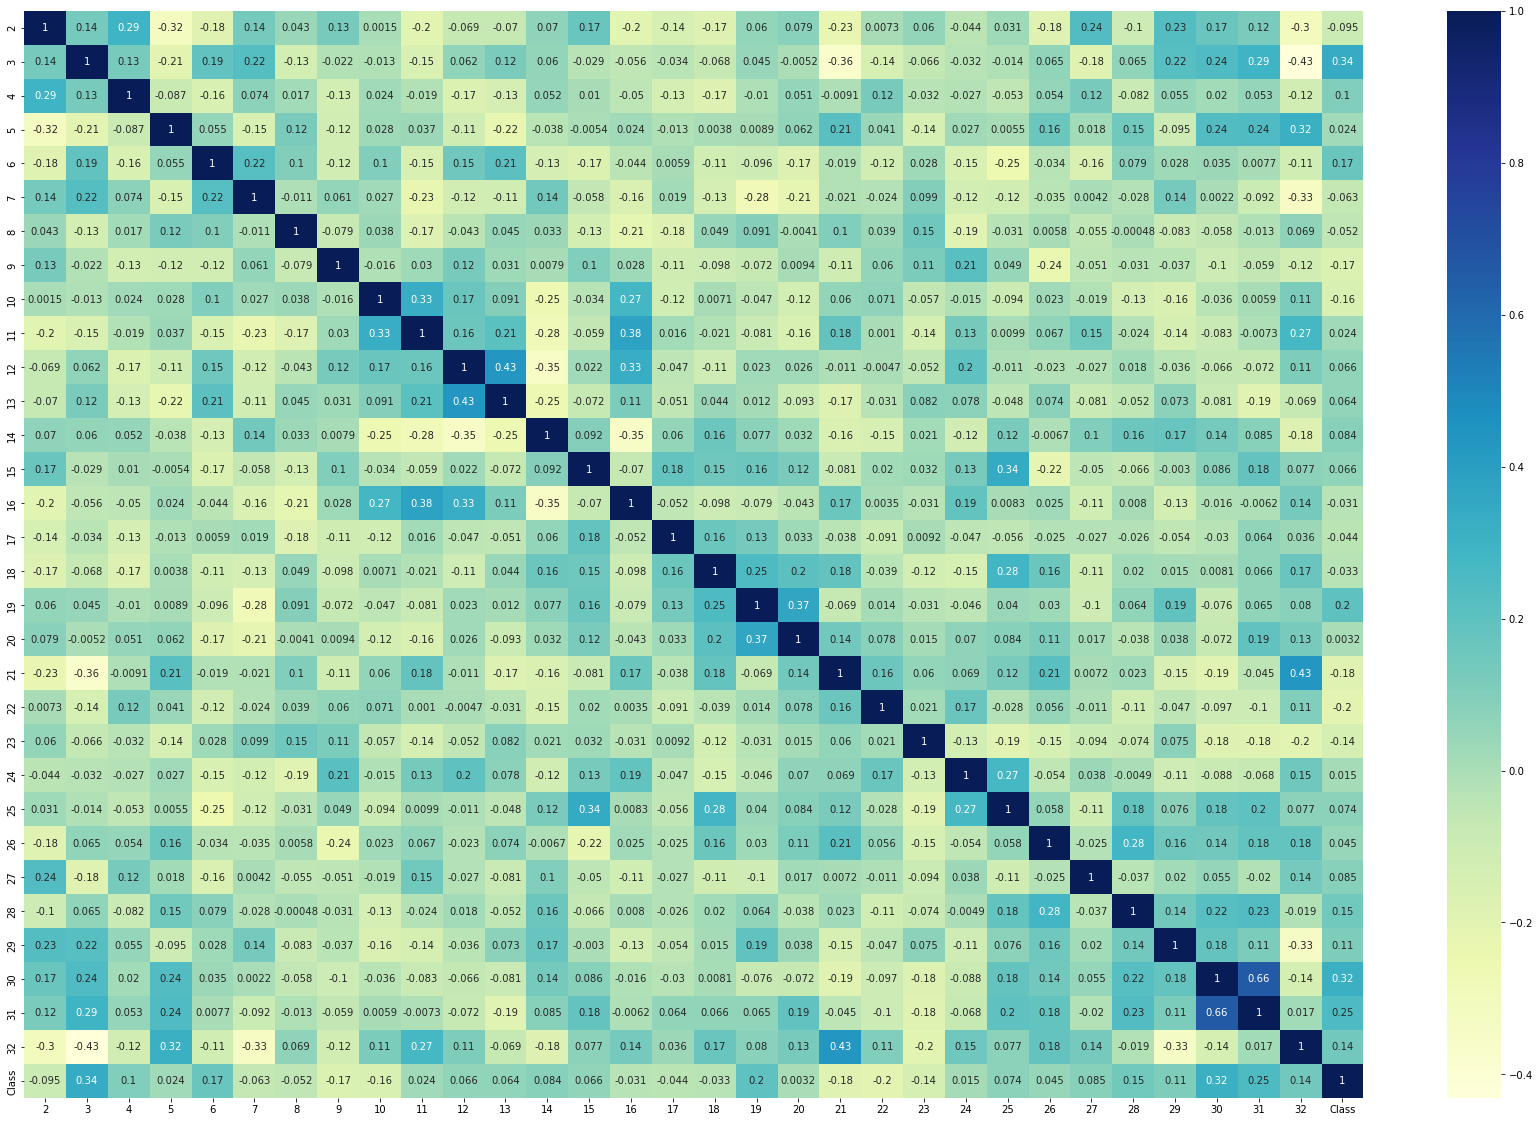

In [11]:
corr = ds.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu",annot=True)
plt.show()

As we can see that there aren't much highly correlated attributes here<br>
For example, there is a high correlation between 30 (Expected Cumulative grade point average in the graduation) and 31 (Course ID) <br>
and for example, there's no correlation between 14 (Parental status) and 4(Scholarship type).

<h3>3-Seperating  the target from the rest of the dataset</h3>

In [12]:
ds=ds.drop(columns=['1'])
X=ds.drop(columns=['Class'])
y=ds['Class']
#we don't need the Student_ID column so we drop it 

In [13]:
y.count()

145

In [14]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,32
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1


<h3>4- Visualization of the dataset</h3>

In order to understand the data distribution, we have to use histogram plots, and based on that we can see if normalization or standardization is needed or not.


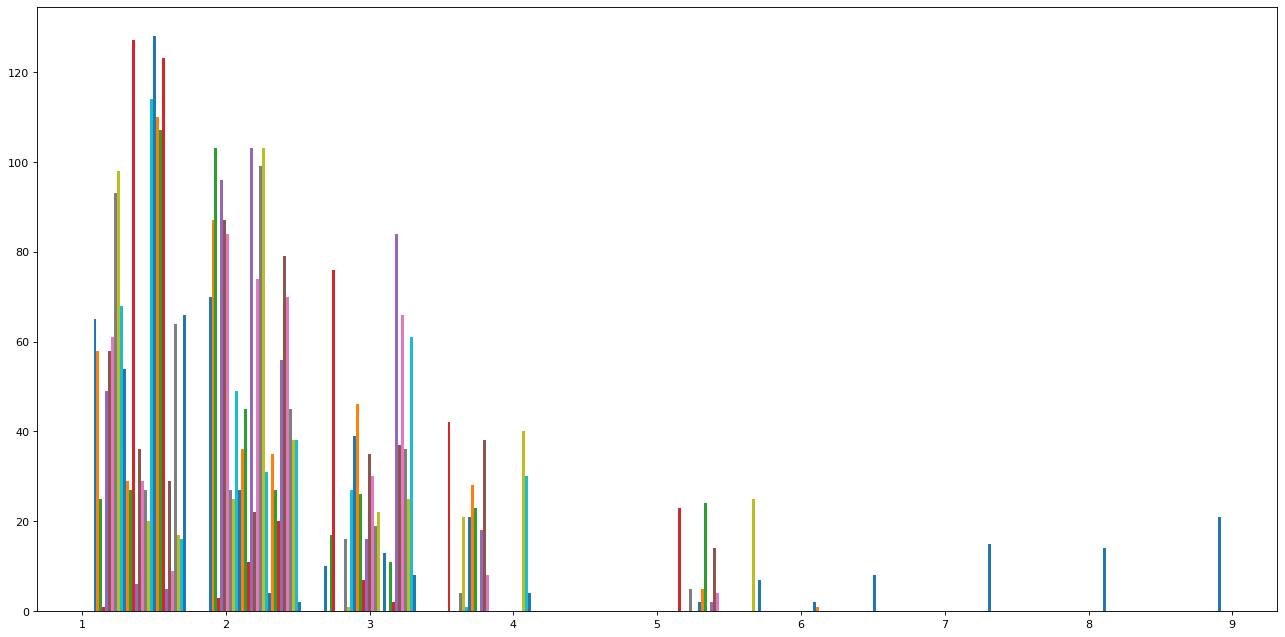

In [15]:
figure(figsize=(20, 10), dpi=80)
plt.hist(X)
plt.show()

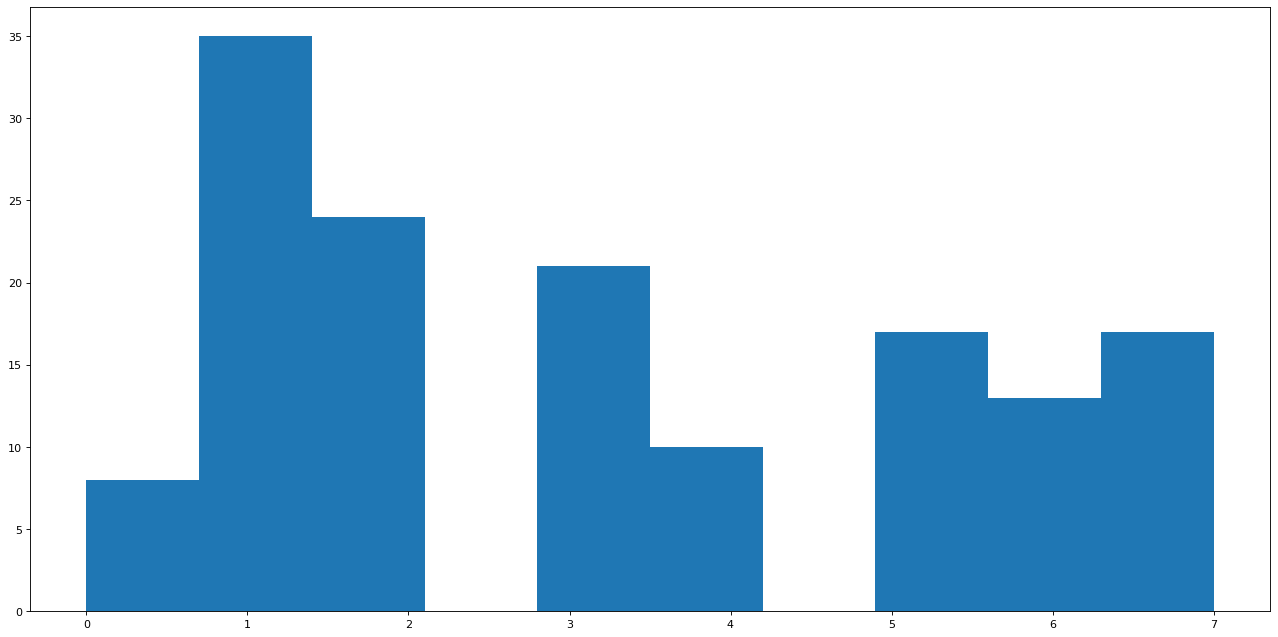

In [16]:
figure(figsize=(20, 10), dpi=80)
plt.hist(y)
plt.show()

Our dataset is unbalanced so we need to deal with that<br>
There are various way to handle that and I'm gonna use RandomOverSampling (to both oversample the data and deal with the imbalance problem) <br> and K-Fold cross validation

<h3>5- outliers</h3>

We need to deal with the outliers, and to realize that if there's anything needed to be done, we need to some plots.<br>
we're gonna use violin plots, Scatter plots and box plots for that matter.

This figure is used in to make the figure with data that contains outliers

<AxesSubplot:>

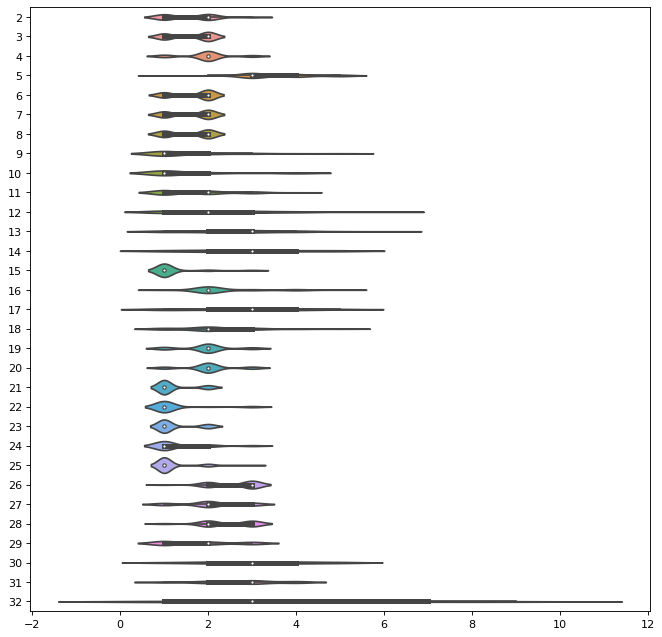

In [17]:
figure(figsize=(10, 10), dpi=80)
sns.violinplot(data=X,orient = "h")

The code below eliminates rows that hvae a z-score higher than 3

In [18]:
X_new=X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
# we eliminate the outliers based on Z-score method 
# this code eliminates each row that contains an outliers

This figure is used in to make the figure without data that contains outliers

<AxesSubplot:>

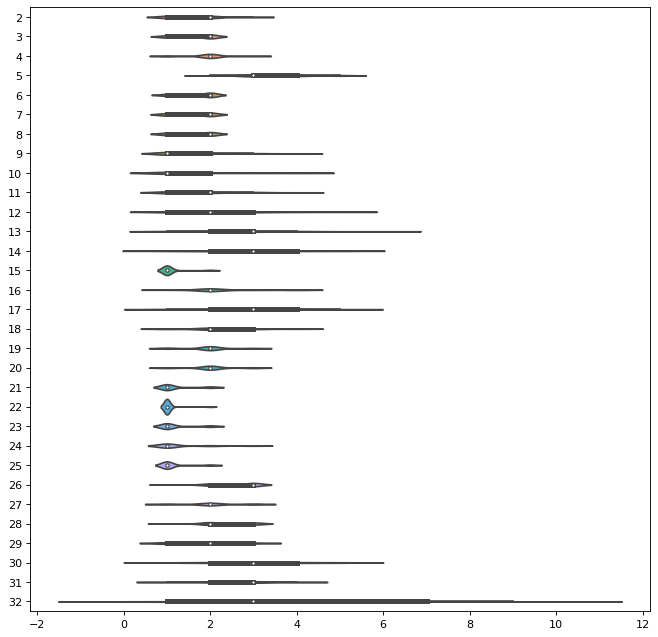

In [19]:
figure(figsize=(10, 10), dpi=80)
sns.violinplot(data=X_new,orient = "h")

we also need to eliminate the same rows in y

In [20]:
ds_new=ds[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
X_new=ds_new.drop(columns=['Class'])
y_new=ds_new['Class']

In [21]:
X_new.head()

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,32
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1


<h3>Standardization</h3>

In [22]:
scaler=StandardScaler()
scaler.fit(X_new)
X_standard_new=scaler.transform(X_new)

In [23]:
#now we have X_standard_new and y_new
#now we have to perfrom oversampling 
print('outlier removal:', sorted(Counter(y_new).items())) #to check the data distribution 


outlier removal: [(0, 4), (1, 32), (2, 17), (3, 17), (4, 7), (5, 15), (6, 12), (7, 13)]


<h3> X_new, y_new = outlier removal</h3> <br>
<h3> X, y =  no outlier  removal</h3> <br>
<h3> X_standard_new, y_standard_new = outlier removal + standardization</h3> <br>
<h3> X_standard, y_standard = no outlier removal+ standardization</h3> <br>


In [24]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_standard_new, y_new)
print(sorted(Counter(y_ros).items()))

[(0, 32), (1, 32), (2, 32), (3, 32), (4, 32), (5, 32), (6, 32), (7, 32)]


In [25]:
y_ros.shape

(256,)

In [26]:
X_ros.shape

(256, 31)

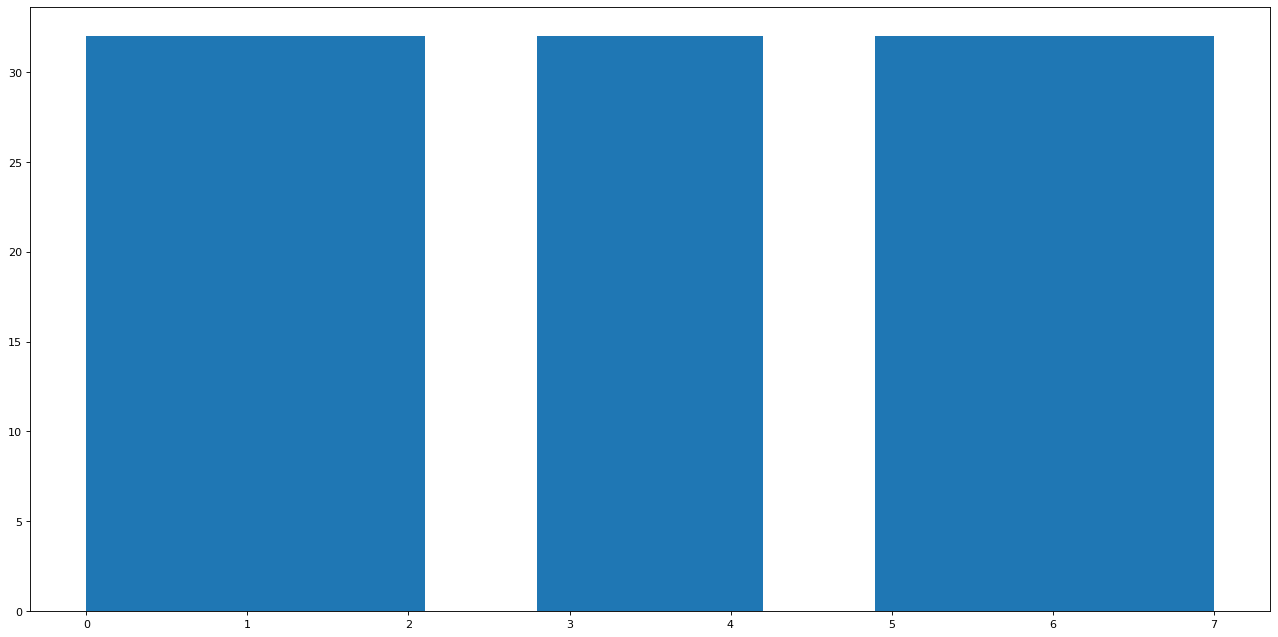

In [27]:
figure(figsize=(20, 10), dpi=80)
plt.hist(y_ros)
plt.show()

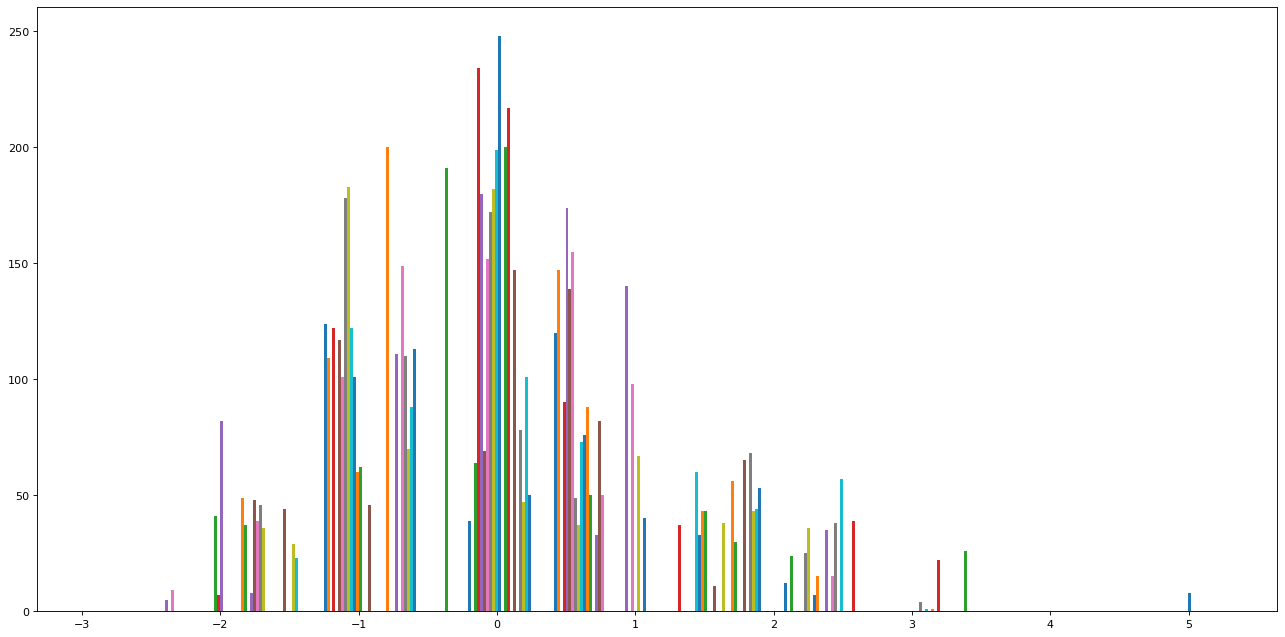

In [28]:
figure(figsize=(20, 10), dpi=80)
plt.hist(X_ros)
plt.show()

As we can see here, our data is balanced now (using Random over sampling method)<br>


<h3>PCA</h3>
attributes in this dataset are not that highly correlatied so PCA won't make that much change


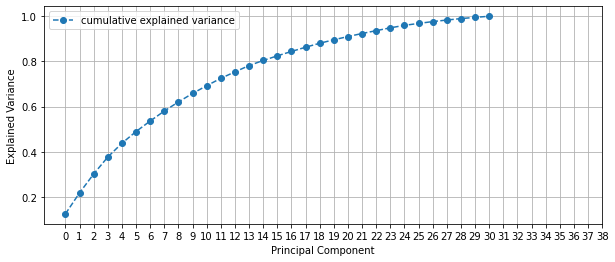

In [29]:
pca_model = PCA()
pca_model.fit(X_ros)
plt.figure(figsize = (10, 4))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), '--o', label = 'cumulative explained variance')
plt.grid()
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend(loc='best')
plt.xticks(np.arange(0, 39, 1.0))
plt.show()

Based on our plot, we can use the "elbow method" to find the best principle component

In [30]:
pca_model = PCA(14)
pca_model.fit(X_ros)
X_ros_pca = pca_model.transform(X_ros)
#X_ros_pca and y_ros

In [31]:
X_ros_pca.shape

(256, 14)

In [32]:
y_ros.shape

(256,)

The dataset is already small and removing the outliers would probably make it harder to the models to have a good result<br>
So we can perform random oversampling, PCA, standardization alongside outlier removal<br>
All the models have been tested both with and without PCA.

<h3> Code for training the model with outlier removal, standardization, oversampling, no PCA</h3>


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=0)

In [38]:
#the function to perform grid search and train the model and also evaluate the model
def train_func(parameters,model,x,y):
    clf=GridSearchCV(model,parameters)
    clf.fit(x,y)
    best_params=clf.best_params_
    best_score = clf.best_score_
    prediction=clf.predict(X_test)
    print('--------------------')
    plot_confusion_matrix(clf, X_test, y_test, values_format='.1f')
    print("best result:\n")
    print(best_score)
    print("best parameters:\n")
    print(best_params)
    print('-------------------')
    print('Report:\n')
    print(classification_report(y_test, prediction))

<h3>SVM</h3>

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Li

--------------------
best result:

0.6957317073170732
best parameters:

{'loss': 'squared_hinge', 'max_iter': 100}
-------------------
Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         6
           2       1.00      0.78      0.88         9
           3       0.43      0.60      0.50         5
           4       0.75      1.00      0.86         9
           5       0.50      0.60      0.55         5
           6       1.00      0.83      0.91         6
           7       1.00      0.80      0.89         5

    accuracy                           0.73        52
   macro avg       0.69      0.70      0.69        52
weighted avg       0.72      0.73      0.72        52



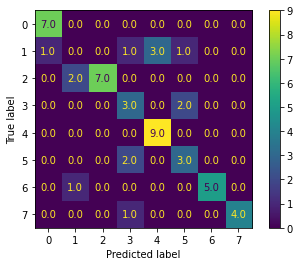

In [39]:
from sklearn.svm import LinearSVC
model=LinearSVC()
parameters = [{'loss': ['hinge', 'squared_hinge'], 'max_iter': [100,1000]}]
train_func(parameters,model,X_train,y_train)

<H3>RandomForest Classifier</H3>

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

--------------------
best result:

0.7746341463414634
best parameters:

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
-------------------
Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         6
           2       0.73      0.89      0.80         9
           3       0.60      0.60      0.60         5
           4       0.90      1.00      0.95         9
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         6
           7       0.80      0.80      0.80         5

    accuracy                           0.79        52
   macro avg       0.71      0.76      0.74        52
weighted avg       0.73      0.79      0.75        52



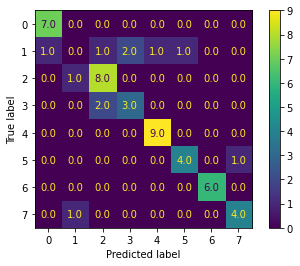

In [40]:
model=RandomForestClassifier()
parameters = [{'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy', 'log_loss'],'n_estimators':[10,100,1000]}]
train_func(parameters,model,X_train,y_train)

<h3>Decision Trees</h3>

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='s

--------------------
best result:

0.7501219512195123
best parameters:

{'criterion': 'log_loss', 'max_features': 'sqrt', 'splitter': 'random'}
-------------------
Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.57      0.67      0.62         6
           2       1.00      0.89      0.94         9
           3       0.75      0.60      0.67         5
           4       0.90      1.00      0.95         9
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6
           7       0.83      1.00      0.91         5

    accuracy                           0.88        52
   macro avg       0.88      0.87      0.87        52
weighted avg       0.89      0.88      0.88        52



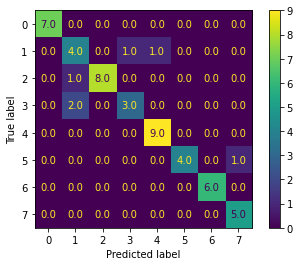

In [41]:
model=DecisionTreeClassifier()
parameters = [{ 'splitter': ['best', 'random'],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy', 'log_loss']}]
train_func(parameters,model,X_train,y_train)

<h3> KNN </h3>

--------------------
best result:

0.7304878048780489
best parameters:

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
-------------------
Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         6
           2       1.00      1.00      1.00         9
           3       0.60      0.60      0.60         5
           4       1.00      1.00      1.00         9
           5       0.67      0.80      0.73         5
           6       0.75      1.00      0.86         6
           7       0.67      0.80      0.73         5

    accuracy                           0.81        52
   macro avg       0.68      0.78      0.72        52
weighted avg       0.72      0.81      0.76        52



C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

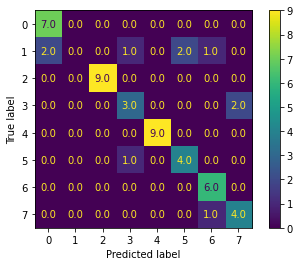

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
parameters = [{ 'n_neighbors': [5, 6,7,8,9,10],'weights': ['uniform', 'distance'],'algorithm': ['ball_tree', 'kd_tree', 'brute','auto']}]
train_func(parameters,model,X_train,y_train)

<h3>With PCA</h3>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_ros_pca, y_ros, test_size=0.20, random_state=0)

<h3>SVM</h3>

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Li

--------------------
best result:

0.4807317073170731
best parameters:

{'loss': 'hinge', 'max_iter': 1000}
-------------------
Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.20      0.17      0.18         6
           2       0.86      0.67      0.75         9
           3       0.60      0.60      0.60         5
           4       0.73      0.89      0.80         9
           5       0.00      0.00      0.00         5
           6       0.40      0.67      0.50         6
           7       0.75      0.60      0.67         5

    accuracy                           0.62        52
   macro avg       0.54      0.57      0.55        52
weighted avg       0.58      0.62      0.59        52



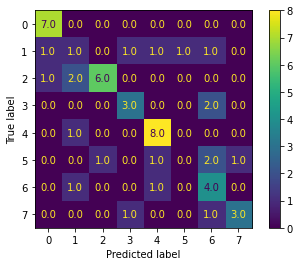

In [45]:
model=LinearSVC()
parameters = [{'loss': ['hinge', 'squared_hinge'], 'max_iter': [100,1000]}]
train_func(parameters,model,X_train,y_train)

<H3>RandomForest Classifier</H3>


C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

--------------------
best result:

0.7503658536585366
best parameters:

{'criterion': 'log_loss', 'max_features': 'auto', 'n_estimators': 100}
-------------------
Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.33      0.50         6
           2       0.90      1.00      0.95         9
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         9
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         6
           7       0.80      0.80      0.80         5

    accuracy                           0.90        52
   macro avg       0.91      0.89      0.87        52
weighted avg       0.91      0.90      0.89        52



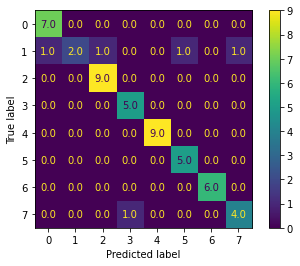

In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
parameters = [{'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy', 'log_loss'],'n_estimators':[10,100,1000]}]
train_func(parameters,model,X_train,y_train)

<h3>Decision Trees</h3>

C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='s

--------------------
best result:

0.75
best parameters:

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
-------------------
Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.50      0.67         6
           2       0.80      0.89      0.84         9
           3       0.60      0.60      0.60         5
           4       0.82      1.00      0.90         9
           5       1.00      0.80      0.89         5
           6       0.86      1.00      0.92         6
           7       0.80      0.80      0.80         5

    accuracy                           0.85        52
   macro avg       0.86      0.82      0.83        52
weighted avg       0.86      0.85      0.84        52



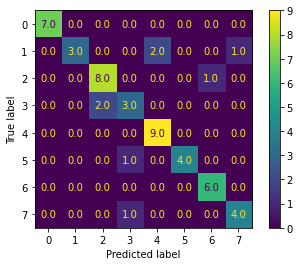

In [47]:
model=DecisionTreeClassifier()
parameters = [{ 'splitter': ['best', 'random'],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy', 'log_loss']}]
train_func(parameters,model,X_train,y_train)

<h3> KNN </h3>

--------------------
best result:

0.7353658536585366
best parameters:

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
-------------------
Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.17      0.29         6
           2       1.00      0.89      0.94         9
           3       0.50      0.60      0.55         5
           4       0.90      1.00      0.95         9
           5       0.50      0.80      0.62         5
           6       0.75      1.00      0.86         6
           7       1.00      0.80      0.89         5

    accuracy                           0.81        52
   macro avg       0.83      0.78      0.76        52
weighted avg       0.86      0.81      0.79        52



C:\Users\aligh\anaconda3\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


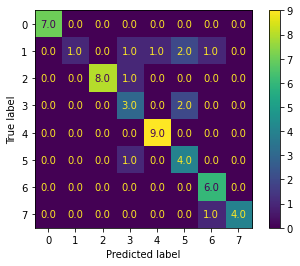

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
parameters = [{ 'n_neighbors': [5, 6,7,8,9,10],'weights': ['uniform', 'distance'],'algorithm': ['ball_tree', 'kd_tree', 'brute','auto']}]
train_func(parameters,model,X_train,y_train)

<b>PCA doesn't make much change since there are not much correlated columns in dataset<br>
<b>It actually decreases the F1 score in all of the models, so it's not a good idea to use it</b>

I also tried different kernels for SVM and linear one still was the best